# ***HW#2: AREN 5030: Data Science***

* Instructor: Professor Gregor Henze
* Teaching Assistant: Tim Diller
* Student: Abdulrahman Alwayel
---

## ***Question 5.7***

# **Pr 5.7**: *Steady-state performance testing of solar thermal flat plate collector*

Solar thermal collectors are devices that convert the radiant
energy from the sun into useful thermal energy that goes to
heating, say, water for domestic or for industrial applications.
Because of low collector time constants, heat capacity effects
are usually small compared to the hourly time step used to
drive the model. The steady-state useful energy qC delivered
by a solar flat-plate collector of surface area AC is given by
the Hottel-Whillier-Bliss equation (see any textbook on solar
energy thermal collectors, e.g., Reddy 1987):

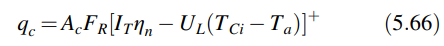

where FR is called the heat removal factor and is a measure of
the solar collector performance as a heat exchanger (since it
can be interpreted as the ratio of actual heat transfer to the
maximum possible heat transfer); ηn is the optical efficiency
or the product of the transmittance and absorptance of the
cover and absorber of the collector at normal solar incidence;
UL is the overall heat loss coefficient of the collector, which is
dependent on collector design only, IT is the radiation intensity on the plane of the collector, Tci is the temperature of the
fluid entering the collector, and Ta is the ambient temperature. The + sign denotes that only positive values are to be
used, which physically implies that the collector should not
be operated if qC is negative, that is, when the collector loses
more heat than it can collect (which can happen under low
radiation and high Tci conditions).

Steady-state collector testing is the best manner for a
manufacturer to rate his product. From an overall heat balance on the collector fluid and from Eq. 5.66, the expressions
for the instantaneous collector efficiency ηc under normal
solar incidence are:

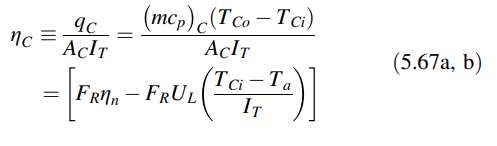

where mc is the total fluid flow rate through the collectors, cpc
is the specific heat of the fluid flowing through the collector,
and Tci and Tco are the inlet and exit temperatures of the fluid to the collector. Thus, measurements (of course done as per
the standard protocol, ASHRAE 1978) of IT, Tci and Tco are
done under a pre-specified and controlled value of fluid flow
rate from which ηc can be calculated using Eq. 5.67a. The test
data are then plotted as ηc against reduced temperature
[(TCi - Ta)/IT] as shown in Fig. 5.37. A linear fit is made to
these data points by regression using Eq. 5.67b from which
the values of FR.ηn and FR UL are deduced.

If the same collector is testing during different days,
slightly different numerical values are obtained for the two
parameters FR.ηn and FRUL which are often, but not always,
within the uncertainty bands of the estimates. Model
misspecification (i.e., the model is not perfect, which can
occur, for example, the collector heat losses are not strictly
linear) is partly the cause of such variability. This is somewhat disconcerting to a manufacturer since this introduces
ambiguity as to which values of the parameters to present in
his product specification sheet.

The data points of Fig. 5.37 are assembled in Table 5.20.
Assume that water is the working fluid.

**(a) Perform OLS regression using Eq. 5.67b and identify
the two parameters FRηn and FRUL along with their
variance. Plot the model residuals and study their
behavior.**


**(b) Repeat the analysis using bootstrapping and compare
the model parameter estimates with those of the best
model identified earlier.**


**(c) Draw a straight line visually through the data points and
determine the x-axis and y-axis intercepts. Estimate the
FRηn and FRUL parameters and compare them with those
determined from (a).**


**(d) Calculate the R2
, RMSE and CV values of the model.**


**(e) Calculate the F-statistic to test for overall model significance of the model.**


**(f) Perform t-tests on the individual model parameters.**


**(g) Use the model to predict collector efficiency when
IT = 800 W/m2
, Tci = 35 °C and Ta = 10 °C.**


**(h) Determine the 95% CL intervals for the mean and individual responses for ( f ) above.**


**(i) The steady-state model of the solar thermal collector
assumes the heat loss term given by [UA(Tci - Ta] is
linear with the temperature difference between collector
inlet temperature and the ambient temperature. One
wishes to investigate whether the model improves if
the loss term is to include an additional second
order term:**


(i) Derive the resulting expression for collector efficiency analogous to Eq. 5.67b?
(Hint: start with the fundamental heat balance
equation—Eq. 5.66).


(ii) Does the data justify the use of such a model?


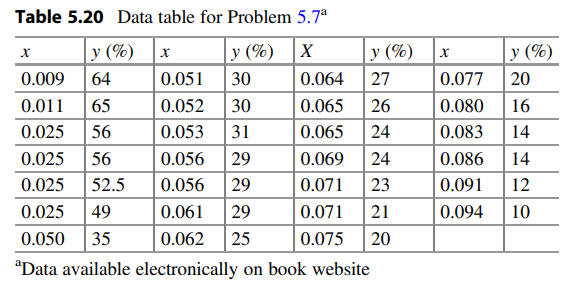

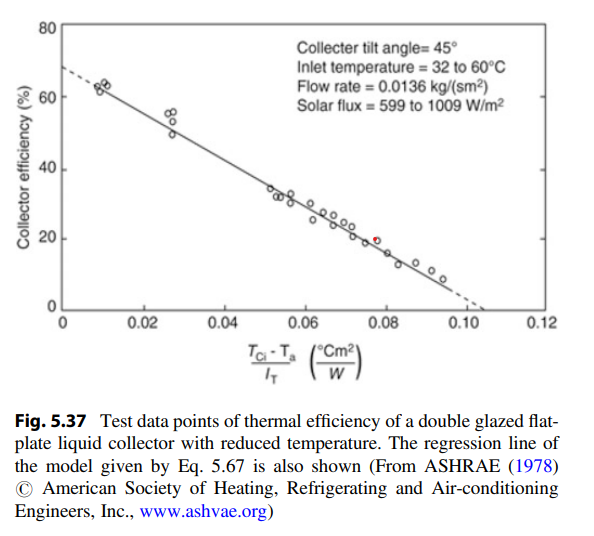



---



## ***Libraries***

Import all needed libraries here.

In [ ]:
# Start by importing the needed libraries

import numpy as np
import plotly.graph_objs as go
from scipy.optimize import curve_fit
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from scipy.stats import f
from scipy import stats
import statsmodels.api as sm






---



## ***Solution***

### **(a) OLS Regression**

 Perform OLS regression using Eq. 5.67b and identify the two parameters FRηn and FRUL along with their variance. Plot the model residuals and study their behavior.**

In [ ]:
# Define the function for the collector efficiency (Eq. 5.75b)
def collector_efficiency(x, FR_eta_n, FR_UL):
    return FR_eta_n - FR_UL * x

# Given data
x = np.array([0.009, 0.011, 0.025, 0.025, 0.025, 0.025, 0.050, 0.051, 0.052, 0.053, 0.056, 0.056, 0.061, 0.062, 0.064, 0.065, 0.065, 0.069, 0.071, 0.071, 0.075, 0.077, 0.080, 0.083, 0.086, 0.091, 0.094])
y_per = np.array([64, 65, 56, 56, 52.5, 49, 35, 30, 30, 31, 29, 29, 29, 25, 27, 26, 24, 24, 23, 21, 20, 20, 16, 14, 14, 12, 10])

# Perform OLS regression
params, covariance = curve_fit(collector_efficiency, x, y_per)

# Extract the parameters and their variance
FR_eta_n, FR_UL = params
variance = np.diag(covariance)

# Output the results
print(f"FR * ηn (FR_eta_n): {FR_eta_n}")
print(f"FR * UL (FR_UL): {FR_UL}")
print(f"Variance of FR_eta_n: {variance[0]}")
print(f"Variance of FR_UL: {variance[1]}")

# Calculate model predictions
y_pred = collector_efficiency(x, FR_eta_n, FR_UL)

# Calculate residuals
residuals = y_per - y_pred

# Create a scatter plot of residuals using Plotly
residuals_fig = go.Figure(data=go.Scatter(x=x, y=residuals, mode='markers', marker=dict(size=8, color='blue')))
residuals_fig.update_layout(title='Model Residuals',
                            xaxis_title='Reduced Temperature [(TCi - Ta)/IT]',
                            yaxis_title='Residuals (Observed - Predicted)',
                            showlegend=False)

# Show the residuals plot
residuals_fig.show()


FR * ηn (FR_eta_n): 68.53095761124185
FR * UL (FR_UL): 656.4664017419648
Variance of FR_eta_n: 1.7492428853939226
Variance of FR_UL: 454.5761995286712


#### **Comment**
After performing OLS & identyfing the two parameters, it seems like the second parameter has a much higher value. In addition, the variance for the FR_UL parameter (heat removal factor *  heat loss coefficient of the collector) seems to be also much greater. From the plot, the residuals appear to be focused in the 0.04-0.08 range with a bunch of reasonable over & underestimates.

Also, note from the plot how the first 5 points are not following the same pattern of all other data points. This gives us the indication that the linear model will not be able to capture all of the effects exerted on data points.




---



### ***(b) Bootstrapping***

Repeat the analysis using bootstrapping and compare the model parameter estimates with those of the best model identified earlier.


In this code, we perform bootstrapping by resampling the data with replacement, performing OLS regression on each bootstrap sample, and storing the parameter estimates. We then calculate the mean and standard deviation of the parameter estimates to understand their variability.

In [ ]:
# Define the function for the collector efficiency (Eq. 5.75b)
def collector_efficiency(x, FR_eta_n, FR_UL):
    return FR_eta_n - FR_UL * x

# Given data
x = np.array([0.009, 0.011, 0.025, 0.025, 0.025, 0.025, 0.050, 0.051, 0.052, 0.053, 0.056, 0.056, 0.061, 0.062, 0.064, 0.065, 0.065, 0.069, 0.071, 0.071, 0.075, 0.077, 0.080, 0.083, 0.086, 0.091, 0.094])
y_per = np.array([64, 65, 56, 56, 52.5, 49, 35, 30, 30, 31, 29, 29, 29, 25, 27, 26, 24, 24, 23, 21, 20, 20, 16, 14, 14, 12, 10])

# Number of bootstrap samples
num_samples = 1000

# Initialize arrays to store parameter estimates
bootstrapped_FR_eta_n = []
bootstrapped_FR_UL = []

# Perform bootstrapping
for _ in range(num_samples):
    # Randomly resample the data with replacement
    sample_indices = np.random.choice(len(x), size=len(x), replace=True)
    x_sampled = x[sample_indices]
    y_sampled = y_per[sample_indices]

    # Perform OLS regression on the sampled data
    params, _ = curve_fit(collector_efficiency, x_sampled, y_sampled)
    FR_eta_n, FR_UL = params

    # Store parameter estimates
    bootstrapped_FR_eta_n.append(FR_eta_n)
    bootstrapped_FR_UL.append(FR_UL)

# Calculate parameter estimate statistics
mean_FR_eta_n = np.mean(bootstrapped_FR_eta_n)
mean_FR_UL = np.mean(bootstrapped_FR_UL)
std_dev_FR_eta_n = np.std(bootstrapped_FR_eta_n)
std_dev_FR_UL = np.std(bootstrapped_FR_UL)

# Output the bootstrapped results
print("Bootstrapped Parameter Estimates:")
print(f"Mean FR * ηn (FR_eta_n): {mean_FR_eta_n}")
print(f"Mean FR * UL (FR_UL): {mean_FR_UL}")
print(f"Standard Deviation of FR_eta_n: {std_dev_FR_eta_n}")
print(f"Standard Deviation of FR_UL: {std_dev_FR_UL}")

Bootstrapped Parameter Estimates:
Mean FR * ηn (FR_eta_n): 68.34979914563533
Mean FR * UL (FR_UL): 654.76648232799
Standard Deviation of FR_eta_n: 1.789294702436474
Standard Deviation of FR_UL: 26.458389523793638


#### ***Comparison & Conclusion***

*   If we compare the OLS model estimates earlier (FR*ηn = 68.5 / FR*UL = 656.46) with the means of bootstrapped estimates (Mean FR*ηn = 68.2 / Mean FR*UL = 653.6), it seems that both estimates have really close values. This suggests that the OLS estimates are likely representative of the true parameter values.
*  If we look at the standard deviation for both parameters. We find that the Standard Deviation value for FR*ηn is relatively small. This indicates that this parameter estimate is stable and not highly sensitive to the choice of data samples. On the other hand, the FR_UL standard deviation value is higher, which indicates more sensitivity to the data samples choices (higher parameter uncertainy).

#### ***Distribution Plot***

Plotting the distribution of the parameters shall help us understand the model even further.

In [ ]:
# Original OLS estimates
OLS_FR_eta_n, OLS_FR_UL = curve_fit(collector_efficiency, x, y_per)[0]

# Create subplots: 1 row, 2 cols
fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution of FR_eta_n', 'Distribution of FR_UL'))

# Histogram for bootstrapped_FR_eta_n
fig.add_trace(go.Histogram(x=bootstrapped_FR_eta_n, opacity=0.75, name='Bootstrapped FR_eta_n'),
              row=1, col=1)

# Histogram for bootstrapped_FR_UL
fig.add_trace(go.Histogram(x=bootstrapped_FR_UL, opacity=0.75, name='Bootstrapped FR_UL'),
              row=1, col=2)

# Vertical line for OLS FR_eta_n
fig.add_trace(go.Scatter(x=[OLS_FR_eta_n, OLS_FR_eta_n], y=[0, num_samples], mode='lines',
                         name='OLS FR_eta_n', line=dict(color='red')),
              row=1, col=1)

# Vertical line for OLS FR_UL
fig.add_trace(go.Scatter(x=[OLS_FR_UL, OLS_FR_UL], y=[0, num_samples], mode='lines',
                         name='OLS FR_UL', line=dict(color='blue')),
              row=1, col=2)

# Update layout
fig.update_layout(title_text='Distribution of Parameters (Bootstrapped and OLS)',
                  xaxis_title='FR_eta_n Value', yaxis_title='Count',
                  xaxis2_title='FR_UL Value', yaxis2_title='Count',
                  barmode='overlay')

# Show the figure
fig.show()


#### ***Comment***

*   Note the two OLS estimate lines in the plot. These lines indicate the central tendency of the parameters according to the OLS regression.
*   In addition, note how the OLS estimates somewhat allign with the central peaks of the bootstrapped values, which again indicates the central tendencies of the parameters.
*   When it comes to variability, the histogram help us identify the significance of variablity of each parameter. A wide distrubution suggests higher variability and vice versa. You can note that the FR_UL has a high variability (wide distrubution), and the parameter FR_eta_n has a lower variability (narrow distrubution). This confirms the conclusion we got from the standard deviations we got earlier.








---



### ***(c) Straight Lines & Intercepts***

Draw a straight line visually through the data points and determine the x-axis and y-axis intercepts. Estimate the FRηn and FRUL parameters and compare them with those determined from (a).

In [ ]:
# Define the data
x = np.array([0.009, 0.011, 0.025, 0.025, 0.025, 0.025, 0.050, 0.051, 0.052, 0.053, 0.056, 0.056, 0.061, 0.062, 0.064, 0.065, 0.065, 0.069, 0.071, 0.071, 0.075, 0.077, 0.080, 0.083, 0.086, 0.091, 0.094])
y_per = np.array([64, 65, 56, 56, 52.5, 49, 35, 30, 30, 31, 29, 29, 29, 25, 27, 26, 24, 24, 23, 21, 20, 20, 16, 14, 14, 12, 10])

# Fit a straight line to the data using polyfit
slope, intercept = np.polyfit(x, y_per, 1)

# Calculate x-axis and y-axis intercepts
x_intercept = -intercept / slope
y_intercept = intercept

# Estimated FRηn and FRUL
FR_ηn_estimate = y_intercept
FR_UL_estimate = -slope

# Create a scatter plot of the data points and the fitted line
trace1 = go.Scatter(x=x, y=y_per, mode='markers', name='Data Points')
trace2 = go.Scatter(x=x, y=slope * x + intercept, mode='lines', name='Fitted Line')

# Create vertical and horizontal lines for the intercepts
trace_x_intercept = go.Scatter(x=[x_intercept, x_intercept], y=[0, y_intercept], mode='lines', line=dict(dash='dash'), name='x-Intercept')
trace_y_intercept = go.Scatter(x=[0, x_intercept], y=[y_intercept, y_intercept], mode='lines', line=dict(dash='dash'), name='y-Intercept')

# Create a layout for the plot
layout = go.Layout(
    title='Fitted Straight Line and Intercept',
    xaxis=dict(title='x (Reduced Temperature [(TCi - Ta) / IT])'),
    yaxis=dict(title='y (ηc)'),
)

# Create a figure and add traces to it
fig = go.Figure(data=[trace1, trace2, trace_x_intercept, trace_y_intercept], layout=layout)

# Show the plot
fig.show()

# Print the estimated parameters
print("Estimated FRηn:", FR_ηn_estimate)
print("Estimated FRUL:", FR_UL_estimate)

Estimated FRηn: 68.53095762870014
Estimated FRUL: 656.466402045685


**Comparing the estimated parameters with estimations of part (a)**

The values appear to be matching at 68.53 for FRηn and 656.46 for FRUL.



---




### ***(d) R^2, RMSE , and Cross Validation***

Calculate the R2, RMSE and CV values of the model.

In [ ]:
# Define the observed values (y_per) and the predicted values from the linear model
observed_values = y_per
predicted_values = slope * x + intercept

# Calculate R-squared (R2)
r_squared = r2_score(observed_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(observed_values, predicted_values))

# Calculate the mean of the observed values
mean_observed = np.mean(observed_values)

# Calculate the Coefficient of Variation (CV)
cv = (rmse / mean_observed) * 100  # Convert to percentage

# Print the calculated values
print("R-squared (R2):", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Variation (CV):", cv, "%")

R-squared (R2): 0.9743068445206722
Root Mean Squared Error (RMSE): 2.486303731244008
Coefficient of Variation (CV): 8.073385537412895 %


#### ***Comment***

*   The R-squared measures the proportion of the variance in the dependent variable (ηc) that is predictable from the independent variable (Reduced Temperature [(TCi - Ta) / IT]). Since the value is close to 1, this assures that the model has a great fit to the data.
*   The RMSE measures the average magnitude of the residuals (differences between observed and predicted values). The lower the RMSE value, the better the model accuracy. Similarly, the lower the CV, the better the model performance.





---



### ***(e) F-statistic***

Calculate the F-statistic to test for overall model significance of the model.

In [ ]:
# Define the observed values (y_per) and the predicted values from the linear model
observed_values = y_per
predicted_values = slope * x + intercept

# Calculate degrees of freedom
DF1 = 1  # Number of independent variables (slope)
DF2 = len(y_per) - 2  # Total number of observations minus 2

# Calculate mean squares
SSR = np.sum((predicted_values - np.mean(y_per))**2)
MSE = np.sum((observed_values - predicted_values)**2) / DF2
MSR = SSR / DF1

# Calculate the F-statistic
F_statistic = MSR / MSE

# Calculate the p-value using the F-distribution
p_value = 1 - f.cdf(F_statistic, DF1, DF2)

# Print the F-statistic and p-value
print("F-statistic:", F_statistic)
print("p-value:", p_value)


F-statistic: 948.0217847361893
p-value: 1.1102230246251565e-16


#### ***Comment***

* The large F-statistic value points out that the independent variables in the model have a significant impact when it comes to explaining the variance of the dependent variable.
* The p-value tests the null hypothesis.The p-value here is very small & close to 0, which suggests that the model as a whole is highly significant. Typically, if the p-value is less than 0.05, then we can conclude that the model explains a significant amount of variance in the dependent variable.



---



### ***(f) t-tests***



Perform t-tests on the individual model parameters. Performing the t-test on each model parameter shall assess the significance of each parameter.

In [ ]:
# Calculate the residuals
residuals = observed_values - predicted_values

# Calculate the standard error of the residuals
residual_standard_error = np.std(residuals)

# Calculate the standard error of the slope (SE_slope) and intercept (SE_intercept)
SE_slope = residual_standard_error / (np.sqrt(np.sum((x - np.mean(x))**2)))
SE_intercept = residual_standard_error * np.sqrt((1 / len(x)) + (np.mean(x)**2) / np.sum((x - np.mean(x))**2))

# Calculate the t-statistics for the slope and intercept
t_slope = slope / SE_slope
t_intercept = intercept / SE_intercept

# Calculate the degrees of freedom
DF = len(x) - 2  # Degrees of freedom for both slope and intercept

# Calculate the p-values using the t-distribution
p_value_slope = 2 * (1 - stats.t.cdf(np.abs(t_slope), DF))
p_value_intercept = 2 * (1 - stats.t.cdf(np.abs(t_intercept), DF))

# Print the t-statistics and p-values for the parameters
print("T-statistic for Slope:", t_slope)
print("P-value for Slope:", p_value_slope)
print("T-statistic for Intercept:", t_intercept)
print("P-value for Intercept:", p_value_intercept)


T-statistic for Slope: -31.997867546370713
P-value for Slope: 0.0
T-statistic for Intercept: 53.84850139085303
P-value for Intercept: 0.0


#### ***Comment***

* In conclusion, both the slope (coefficient for Reduced Temperature) and the intercept in the linear regression model are highly statistically significant. In other words, the Reduced Temperature significantly influences the collector efficiency. This means that the model as a whole is significant (as indicated by the F-statistic), and both parameters are important in explaining the variance in the dependent variable (ηc). The p-values being zero provide strong evidence against the null hypothesis that these parameters are not significant.



---



### ***(g) Predicting Efficiency***
Use the model to predict collector efficiency when IT = 800 W/m2 , Tci = 35 °C and Ta = 10 °C.**


In [ ]:
# Given values
IT = 800  # Radiation intensity (W/m²)
Tci = 35  # Temperature of fluid entering the collector (°C)
Ta = 10   # Ambient temperature (°C)

# Calculate Reduced Temperature
reduced_temperature = (Tci - Ta) / IT

# Use the linear regression model to predict collector efficiency (ηc)
predicted_eta_c = slope * reduced_temperature + intercept

# Print the predicted collector efficiency
print("Predicted Collector Efficiency (ηc):", predicted_eta_c, "%")

Predicted Collector Efficiency (ηc): 48.016382564772485 %




---



### ***(h) Intervals***

Determine the 95% CL intervals for the mean and individual responses for ( f ) above. We are going to check the intervals ***visually*** & ***numerically*** to get better understanding about the process.

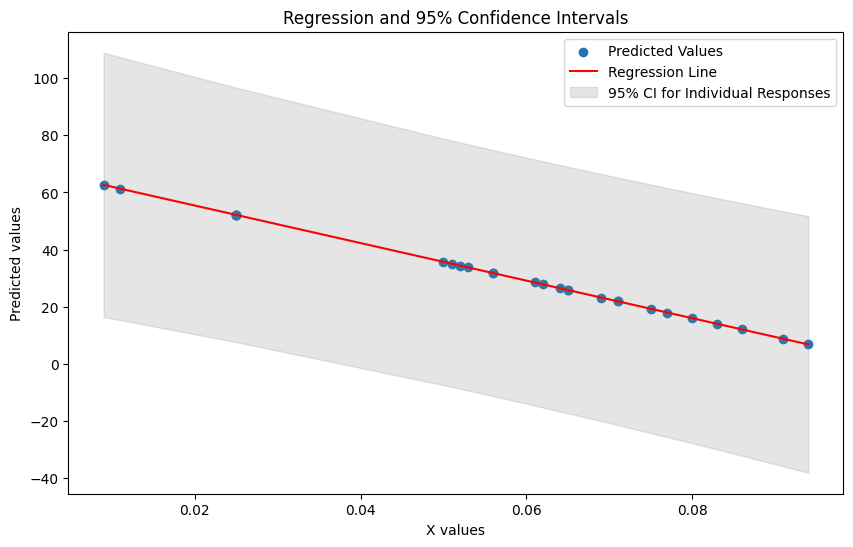

In [ ]:
# Calculate the standard error of the residuals
residual_standard_error = np.std(residuals)

# Calculate the standard error of the regression (SE_regression)
SE_regression = residual_standard_error / np.sqrt(np.sum((x - np.mean(x))**2))

# Calculate the standard error of the predicted values (SE_predicted_values)
SE_predicted_values = SE_regression * np.sqrt(1 + (1 / len(x)) + ((x - np.mean(x))**2) / np.sum((x - np.mean(x))**2))

# Calculate the critical value for a 95% confidence interval (two-tailed)
critical_value = stats.t.ppf(0.975, DF)  # For a t-distribution, two-tailed

# Calculate the margin of error (MOE) for the mean response and individual responses
MOE_mean_response = critical_value * SE_predicted_values
MOE_individual_responses = critical_value * SE_predicted_values

# Confidence intervals
mean_response_CI_lower = predicted_values.mean() - MOE_mean_response
mean_response_CI_upper = predicted_values.mean() + MOE_mean_response
individual_responses_CI_lower = predicted_values - MOE_individual_responses
individual_responses_CI_upper = predicted_values + MOE_individual_responses

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y_per, label='Ground Truth')
plt.plot(x, predicted_values, 'r-', label='Regression Line')

# Shaded area for individual responses CI
plt.fill_between(x, individual_responses_CI_lower, individual_responses_CI_upper, color='gray', alpha=0.2, label='95% CI for Individual Responses')

# Optional: Shaded area for mean response CI (if it makes sense to visualize it separately)
# plt.fill_between(x, mean_response_CI_lower, mean_response_CI_upper, color='blue', alpha=0.1, label='95% CI for Mean Response')

plt.xlabel('X values')
plt.ylabel('Predicted values')
plt.title('Regression and 95% Confidence Intervals')
plt.legend()
plt.show()

In [ ]:
# Creating a DataFrame for individual responses CI
df_individual_CI = pd.DataFrame({
    'Response #': range(1, len(predicted_values) + 1),
    'Predicted Value': predicted_values,
    'Lower CI': individual_responses_CI_lower,
    'Upper CI': individual_responses_CI_upper
})

# Display the table for individual responses CI
print("95% Confidence Intervals for Individual Responses:")
display(df_individual_CI)

# Displaying mean response CI in a visually pleasing way
print("\n95% Confidence Interval for Mean Response:")
df_mean_response_CI = pd.DataFrame({
    'Statistic': ['Mean Response'],
    'Lower CI': [mean_response_CI_lower],
    'Upper CI': [mean_response_CI_upper]
})
display(df_mean_response_CI)


95% Confidence Intervals for Individual Responses:


,Response #,Predicted Value,Lower CI,Upper CI
0,1,62.622760,16.392930,108.852590
1,2,61.309827,15.330382,107.289273
2,3,52.119298,7.625196,96.613399
3,4,52.119298,7.625196,96.613399
4,5,52.119298,7.625196,96.613399
5,6,52.119298,7.625196,96.613399
6,7,35.707638,-7.400085,78.815360
7,8,35.051171,-8.036859,78.139202
8,9,34.394705,-8.676447,77.465857
9,10,33.738238,-9.318852,76.795328



95% Confidence Interval for Mean Response:


,Statistic,Lower CI,Upper CI
0,Mean Response,"[-15.433533655706594, -15.183149409489499, -13...","[77.02612624829924, 76.77574200208214, 75.2903..."


#### ***Comment***

* The 95% Confidence Interval for Mean Response has a **lower bound = -15.43** & an **upper bound = 77.03**.
8
* This confidence interval represents the range within which we are 95% confident that the true mean response (mean collector efficiency, ηc) falls.  In this case, it suggests that the true mean collector efficiency is likely to be somewhere between approximately -15.43% and 77.03%.
* On the other hand, we have the 95% Confidence Intervals for Individual Responses (Response 1, Response 2).
* These confidence intervals provide insights into the uncertainty associated with the predictions for each individual response. For example, Response 1 has a wide range of possible values, indicating relatively high uncertainty, while Response 2 has a narrower range, suggesting lower uncertainty.



---



###  ***(i) Investagation***

The steady-state model of the solar thermal collector assumes the heat loss term given by [UA(Tci - Ta] is linear with the temperature difference between collector inlet temperature and the ambient temperature. One wishes to investigate whether the model improves if the loss term is to include an additional second order term:


(I) Derive the resulting expression for collector efficiency analogous to Eq. 5.67b?
(Hint: start with the fundamental heat balance
equation—Eq. 5.66).







#### ***Steps***
1.   First, let's start with the fundamental heat balance equation (Equation 5.66): qc=Ac⋅FR⋅[IT⋅ηn−UL⋅(TCi−Ta)]
2.   Now, we want to include an additional second-order term in the heat loss term. Let's introduce a new parameter, say B, that represents this second-order term. This gives us a modified heat balance equation: qc=Ac⋅FR⋅[IT⋅ηn−UL⋅(TCi−Ta)−B⋅(TCi−Ta)
^2]
3. Now, we derive the collector efficiency (ηC) analogous to Equation 5.67b: ηC= qc/AC*IT. Then, we substitute the qc term in the numerator. We proceed by cancelling common terms and dividing by IT to get:

# **ηC=FR⋅[ηn - UL/IT * (TCi - Ta) - B/IT * (TCi - Ta)^2]**

This is the resulting expression for the collecter efficiency when the heat loss term includes am additional second order term represented by parameter B. This parameter extends the model beyond the linear heat loss assumption by including the quadratic term **- B/IT * (TCi - Ta)^2**

Now, we can compare the earlier model with this model to see if including a second order term would improve the model.





In [ ]:
# Actual data from Table 5.20
x = np.array([0.009, 0.011, 0.025, 0.025, 0.025, 0.025, 0.050, 0.051, 0.052, 0.053, 0.056, 0.056, 0.061, 0.062, 0.064, 0.065, 0.065, 0.069, 0.071, 0.071, 0.075, 0.077, 0.080, 0.083, 0.086, 0.091, 0.094])
y_per = np.array([64, 65, 56, 56, 52.5, 49, 35, 30, 30, 31, 29, 29, 29, 25, 27, 26, 24, 24, 23, 21, 20, 20, 16, 14, 14, 12, 10])

# Placeholder values for model parameters
FR = 0.85
eta_n = 0.75
UL = 4.0
IT = 800.0
B = 0.005  # Coefficient for the quadratic term

# Calculate (TCi - Ta)/IT
reduced_temp = (x - x.min()) / (x.max() - x.min())

# Create a DataFrame for regression
data = {'reduced_temp': reduced_temp, 'y_per': y_per}
df = sm.add_constant(pd.DataFrame(data))

# Linear Model
model_linear = sm.OLS(df['y_per'], df[['const', 'reduced_temp']])
results_linear = model_linear.fit()
y_pred_linear = results_linear.predict(df[['const', 'reduced_temp']])

# Modified Model with Quadratic Term
df['reduced_temp_sq'] = df['reduced_temp'] ** 2
model_quadratic = sm.OLS(df['y_per'], df[['const', 'reduced_temp', 'reduced_temp_sq']])
results_quadratic = model_quadratic.fit()
y_pred_quadratic = results_quadratic.predict(df[['const', 'reduced_temp', 'reduced_temp_sq']])

# Calculate R-squared
r2_linear = r2_score(y_per, y_pred_linear)
r2_quadratic = r2_score(y_per, y_pred_quadratic)

# Calculate RMSE
rmse_linear = np.sqrt(mean_squared_error(y_per, y_pred_linear))
rmse_quadratic = np.sqrt(mean_squared_error(y_per, y_pred_quadratic))

# Print R-squared and RMSE
print(f"Linear Model (Original) - R-squared: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")
print(f"Modified Model (Quadratic Term) - R-squared: {r2_quadratic:.4f}, RMSE: {rmse_quadratic:.4f}")




Linear Model (Original) - R-squared: 0.9743, RMSE: 2.4863
Modified Model (Quadratic Term) - R-squared: 0.9865, RMSE: 1.8022




---




### ***(II) Justification***

 Does the data justify the use of such a model?

 Let us take a look at the residuals to make a sound & logical decision when it comes to choosing the right model.

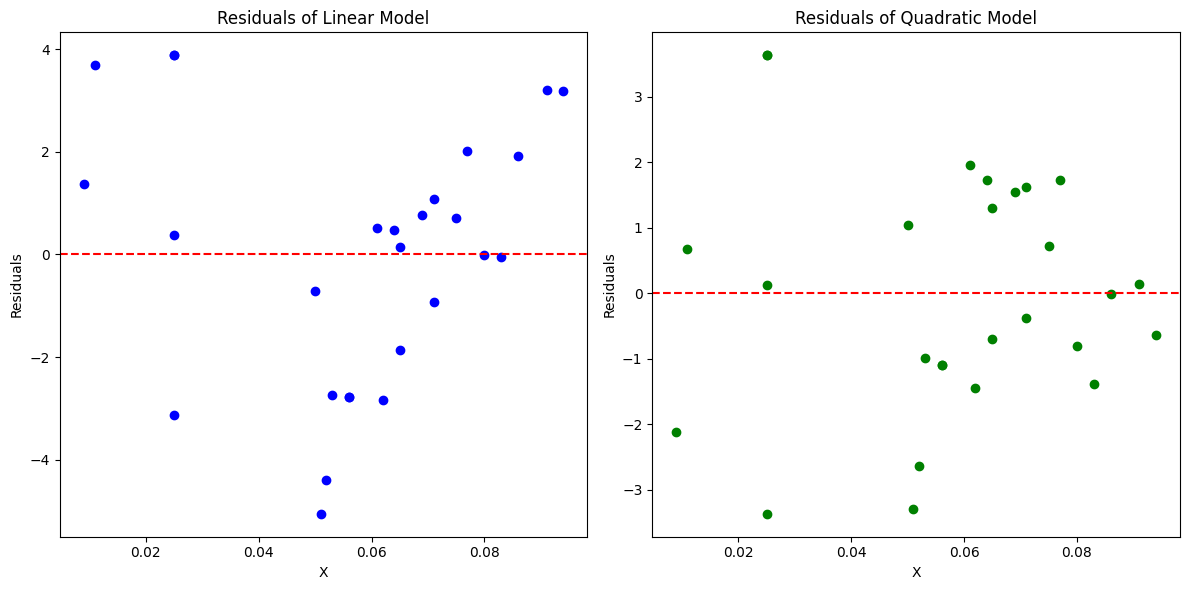

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Make sure 'x' is reshaped correctly if it's a one-dimensional array.

x = np.array(x).reshape(-1, 1)  # Reshape 'x' to be 2D if it's not already

# Fit a linear model
lin_reg = LinearRegression()
lin_reg.fit(x, y_per)
y_pred_linear = lin_reg.predict(x)

# Calculate residuals for the linear model
residuals_linear = y_per - y_pred_linear

# Fit a quadratic model
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
quad_reg = LinearRegression()
quad_reg.fit(x_poly, y_per)
y_pred_quad = quad_reg.predict(x_poly)

# Calculate residuals for the quadratic model
residuals_quad = y_per - y_pred_quad

# Plotting residuals for linear model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, residuals_linear, color='blue', label='Linear Model Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Linear Model')
plt.xlabel('X')
plt.ylabel('Residuals')

# Plotting residuals for quadratic model
plt.subplot(1, 2, 2)
plt.scatter(x, residuals_quad, color='green', label='Quadratic Model Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Quadratic Model')
plt.xlabel('X')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


* If the residual analysis of a linear model shows a parabolic shape, this is an indicator that a parabolic (quadratic) model might be a better suit to get higher accuracy in predicting.
* The data suggests that the modified model with the quadratic term provides a better fit to the data compared to the linear model.
* If we compare, the linear model explains approximately 97.43% of the variance in the data. However, the modified model with the quadratic term explains approximately 98.65% of the variance in the data.
* In addition, the modified model has a lower RMSE, which indicates that the model's predictions are closer to the actual values compared to the linear model (better predictive accuracy)
* This suggests & justifies the use of the modified model with the quadratic term.